In [46]:
import pandas as pd
from matplotlib.figure import Figure
import pymysql
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

In [53]:
#建立连接
conn = pymysql.connect(
	host="114.116.114.149",
	port=10022,
	user="exomics_admin",
	passwd="exomics_2022",
	db='exOmics'
)

#设定要查询的数据类型和基因
gene = 'ENSG00000067221' #基因主页所对应的基因
feature = 'splc' #此处值是范例，实际上需要根据网页决定
dataset = 'gse68086' #此处值是范例，实际上需要根据网页决定
disease = 'lihc' #此处值是范例，实际上需要根据网页决定
specimen = 'tep' #此处值是范例，实际上需要根据网页决定

#以下变量由上述选择自动决定，因为具有关联性
molecule = 'cfrna'
entity = 'entity'
value = 'iclv'

#查询语句
query_sql = f"""
    SELECT c.*
    FROM `{molecule}-{feature}-{dataset}-{entity}-{disease}-{specimen}-{value}` c, gene_index g
    WHERE c.feature LIKE CONCAT('%',g.ensembl_gene_id,'%')
        AND g.ensembl_gene_id LIKE '%{gene}%'
"""

#获得表格，可以直接在网页中展示
table = pd.read_sql_query(query_sql, conn)
table = table.set_index('feature') #feature列设为index

In [54]:
table

,SRR1982608,SRR1982609,SRR1982610,SRR1982611,SRR1982612,SRR1982613,SRR1982614,SRR1982615,SRR1982616,SRR1982617,SRR1982753,SRR1982754,SRR1982755,SRR2096496
feature,,,,,,,,,,,,,,
SE|ENSG00000067221.13|STOML1|chr15|-|73989107|73989257|73988598|73988802|73990350|73990457,NA,NA,NA,NA,1.0,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [41]:
diseases_data = {}
for disease in diseases['Disease_condition']:
	query_sql = f"""
		SELECT c.*
		FROM `{molecule}-{feature}-{dataset}-{entity}-{disease}-{specimen}-{value}` c, gene_index g
		WHERE c.feature LIKE CONCAT('%',g.ensembl_gene_id,'%')
			AND g.ensembl_gene_id LIKE '%{gene}%'
	"""
	temp = pd.read_sql_query(query_sql, conn) #选择某个疾病类型下的某个基因的所有样本的值，应当是1*n的矩阵
	diseases_data[disease.upper()] = list(temp.iloc[0,1:].astype('float'))

/Users/limingyang/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/limingyang/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/limingyang/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [42]:
diseases_data

{'CT_CP': [40.9029,
  32.6943,
  42.7352,
  24.9516,
  28.6238,
  21.4533,
  39.2044,
  29.154,
  10.9424,
  26.9143,
  39.1077,
  40.2244,
  31.7764,
  34.3614,
  20.2588,
  25.9983,
  29.8925,
  23.83,
  28.0889,
  39.8241,
  29.5652,
  25.1794,
  22.5996,
  36.2301,
  28.6648,
  23.2633,
  27.6443,
  31.8676,
  23.9977,
  35.6815,
  35.9461,
  34.116,
  39.0551,
  42.3077,
  31.6704,
  23.258,
  28.6915,
  34.9852,
  26.4036,
  29.2947,
  20.7633,
  41.6137,
  21.6967,
  40.6213,
  37.8557,
  36.0739,
  30.5572,
  23.2773,
  35.7647,
  23.9286,
  30.8461,
  33.1081,
  30.9234,
  38.913,
  36.1787,
  33.6834,
  36.8889,
  27.399,
  43.2104,
  27.3336,
  30.2802,
  25.6641,
  40.199,
  12.152,
  18.2223,
  27.6685,
  22.6729,
  23.0198,
  38.4027,
  27.9478,
  20.9476,
  24.8559,
  25.7962,
  21.2961,
  20.54,
  16.4637,
  12.6327,
  34.2031,
  16.5683,
  27.2823,
  33.6812,
  37.9181,
  16.7517,
  16.1435,
  18.8631,
  13.7013,
  16.9235,
  40.8039,
  13.9101,
  27.9838,
  26.4828,
 

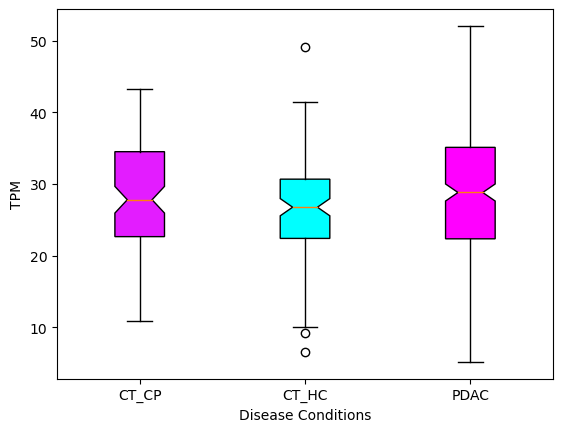

In [47]:
labels, data = diseases_data.keys(), diseases_data.values()
fig = Figure()
ax = fig.subplots()
plotfig = ax.boxplot(data,notch=True,patch_artist=True,labels=labels)
ax.set_xlabel('Disease Conditions')
ax.set_ylabel(f'{value.upper()}')
cmap = cm.ScalarMappable(cmap=mpl.cm.cool)
test_mean = [np.mean(x) for x in data]
for patch, color in zip(plotfig['boxes'], cmap.to_rgba(test_mean)):
    patch.set_facecolor(color)
fig

TypeError: 'dict_values' object is not subscriptable